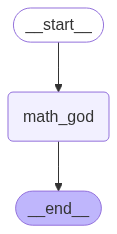

{'name': 'God', 'wallet': [100, 2, 20, 2, 2], 'operator': '*', 'result': 16000}
{'name': 'God', 'wallet': [100, 2, 20, 2, 2], 'operator': '+', 'result': 126}


In [26]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import Image, display

def print_graph(app):
    display(Image(app.get_graph().draw_mermaid_png))
    
class AgentState(TypedDict): # State Schema
    name : str
    wallet: List[int]
    operator : str
    result : int

def math_god_node(state: AgentState) -> AgentState:
    """Node that sums the dolla dolla bills in math god's wallet"""
    moolah = 0
    match state["operator"]:
        case "*":
            # (state["wallet"])
            moolah = 1
            for i in state["wallet"]:
                moolah *= i
                
        case "+":
            moolah = sum(state["wallet"])

    state['result'] = moolah

    
    
    return state


    
def greeting_node(state: AgentState) -> AgentState:
    """Node that adds a greeting to the state"""

    state['message'] = "Hello " + state["message"] + ", how is your day going?"
    return state

def compliment_node(state: AgentState) -> AgentState:
    """Node that adds a compliment to the state"""

    state['message'] = "Wow " + state["message"] + "! You look amazing today!"
    return state


graph = StateGraph(AgentState)

graph.add_node("math_god", math_god_node)

graph.set_entry_point("math_god")
graph.set_finish_point("math_god")

app = graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))

answers = app.invoke({"name": "God", "wallet": [100, 2, 20, 2, 2], "operator": "*"})
print(answers)
answers = app.invoke({"name": "God", "wallet": [100, 2, 20, 2, 2], "operator": "+"})
print(answers)
